In [1]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from utils import *
from src import *

2024-11-23 16:33:08.442347: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 16:33:08.453003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732375988.466125   34879 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732375988.469685   34879 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 16:33:08.482838: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]

/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


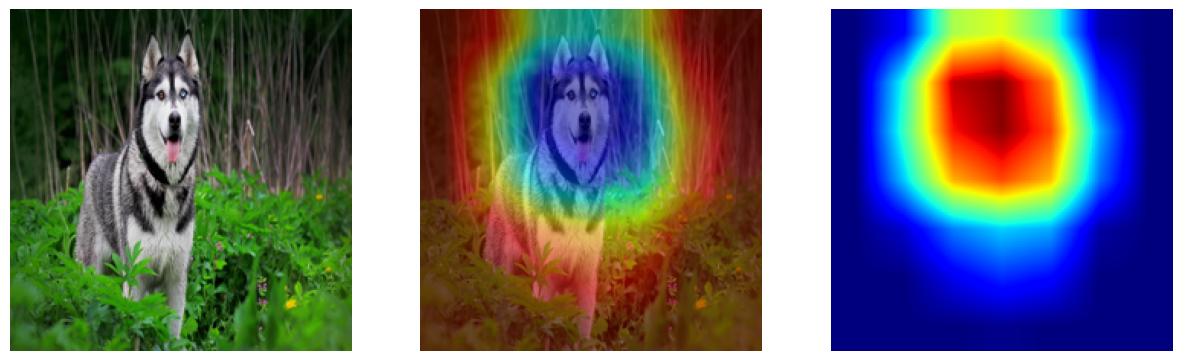

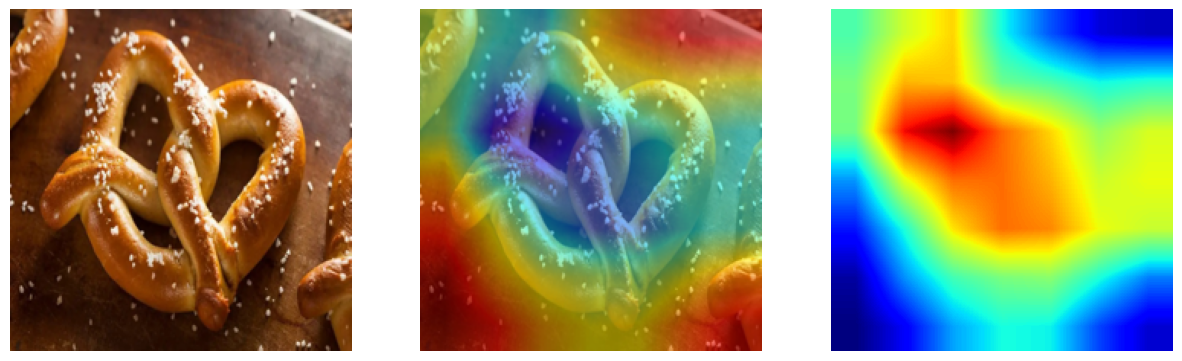

In [3]:
input_tensor = get_image_torch('images/husky.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(250)]

with GradCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/gradcam_husky_lib.png')

input_tensor = get_image_torch('images/precelek.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(932)]

with GradCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/gradcam_precel_lib.png')

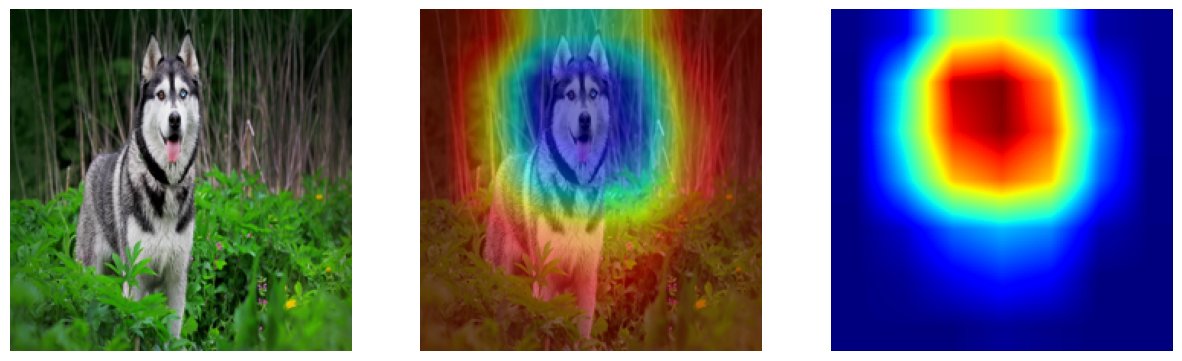

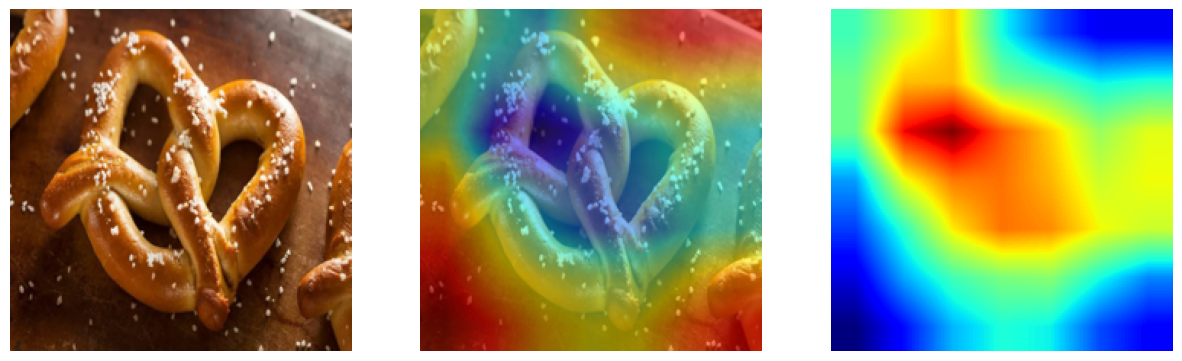

In [4]:
input_tensor = get_image_torch('images/husky.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(250)]

with HiResCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/hirescam_husky_lib.png')

input_tensor = get_image_torch('images/precelek.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(932)]

with HiResCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/hirescam_precel_lib.png')

100%|██████████| 64/64 [02:21<00:00,  2.21s/it]


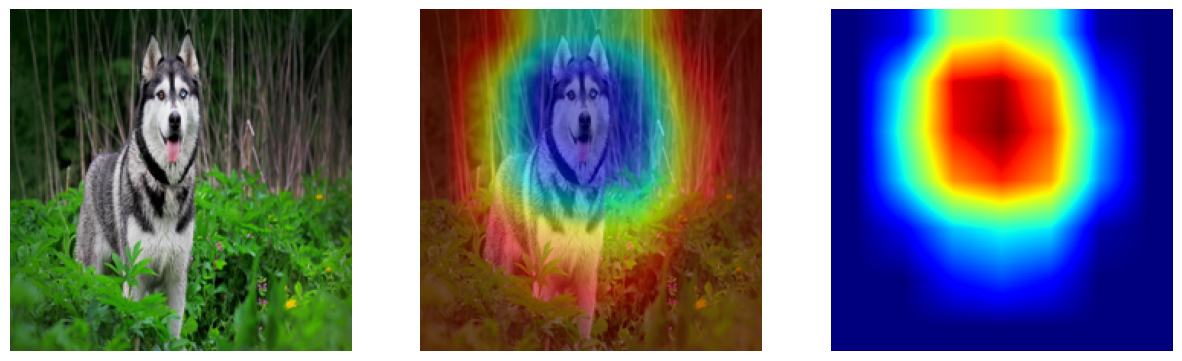

100%|██████████| 64/64 [02:38<00:00,  2.47s/it]


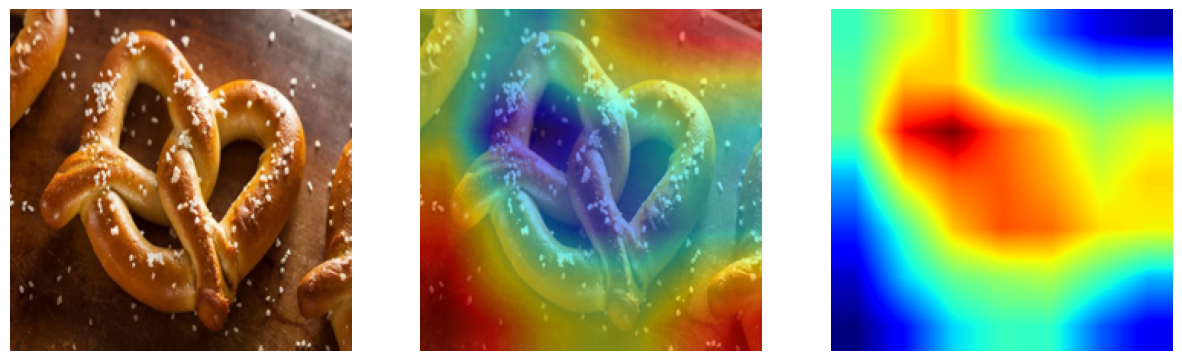

In [5]:
input_tensor = get_image_torch('images/husky.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(250)]

with AblationCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/ablationcam_husky_lib.png')

input_tensor = get_image_torch('images/precelek.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(932)]

with AblationCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), grayscale_cam, 0.5, 'images_prezentacja/ablationcam_precel_lib.png')